In [1]:
from neuron import h
from neuron.units import mV, ms, um
import spikedelayer as sd
import matplotlib.pyplot as plt

h.load_file("stdrun.hoc")



--No graphics will be displayed.


1.0

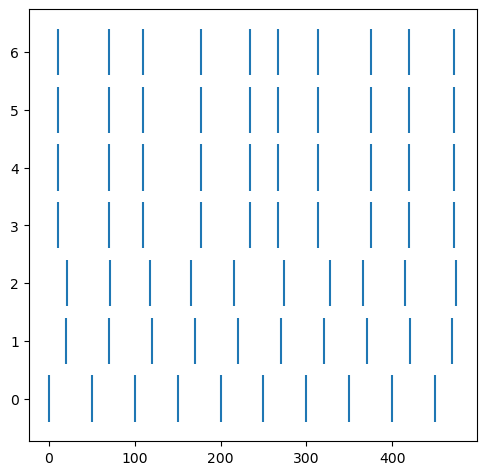

In [2]:

ns = h.NetStim()
ns.interval = 50
ns.start = 0
ns.noise = False
ns.number = 10

stim_t = h.Vector()
stim_id = h.Vector()

nc = h.NetCon(ns, None)
nc.record(stim_t, stim_id)

soma1 = h.Section(name="soma1")
soma2 = h.Section(name="soma2")
soma3 = h.Section(name="soma3")
soma4 = h.Section(name="soma4")
soma5 = h.Section(name="soma5")
soma6 = h.Section(name="soma6")
h.hh.insert([soma1, soma2, soma3, soma4, soma5, soma6])
soma6.L = soma6.diam = soma5.L = soma5.diam = soma4.L = soma4.diam = soma3.L = soma3.diam = soma2.L = soma2.diam = soma1.L = soma1.diam = 10 * um

nc1 = h.NetCon(soma1(0.5)._ref_v, None, sec=soma1)
nc1.record(stim_t, stim_id)
syn1 = h.ExpSyn(soma1(0.5))

nc2 = h.NetCon(soma2(0.5)._ref_v, None, sec=soma2)
nc2.record(stim_t, stim_id)
syn2 = h.ExpSyn(soma2(0.5))

nc3 = h.NetCon(soma3(0.5)._ref_v, None, sec=soma3)
nc3.record(stim_t, stim_id)
syn3 = h.ExpSyn(soma3(0.5))

nc4 = h.NetCon(soma4(0.5)._ref_v, None, sec=soma4)
nc4.record(stim_t, stim_id)
syn4 = h.ExpSyn(soma4(0.5))

nc5 = h.NetCon(soma5(0.5)._ref_v, None, sec=soma5)
nc5.record(stim_t, stim_id)
syn5 = h.ExpSyn(soma5(0.5))

nc6 = h.NetCon(soma6(0.5)._ref_v, None, sec=soma6)
nc6.record(stim_t, stim_id)
syn6 = h.ExpSyn(soma6(0.5))



primary_nc1 = h.NetCon(ns, syn1)
primary_nc1.weight[0] = 0.1
primary_nc1.delay = 20 * ms

primary_nc2 = sd.NetCon(ns, syn2)
primary_nc2.weight[0] = 0.1
primary_nc2.mean_delay = 20 * ms
primary_nc2.std_delay = 4 * ms


delayer = h.SpikeDelayer()
delayer.mean_delay = 20 * ms
delayer.std_delay = 8 * ms

primary_nc3 = sd.NetCon(ns, syn3, delayer = delayer, nc0_need = True)
primary_nc3.weight[0] = 0.1

primary_nc4 = sd.NetCon(ns, syn4, delayer = delayer, nc0_need = False)
primary_nc4.weight[0] = 0.1

primary_nc5 = sd.NetCon(ns, syn5, delayer = delayer, nc0_need = False)
primary_nc5.weight[0] = 0.1

primary_nc6 = sd.NetCon(ns, syn6, delayer = delayer, nc0_need = False)
primary_nc6.weight[0] = 0.1

# primary_nc3 = sd.NetCon(ns, syn3)
# primary_nc3.weight[0] = 0.1
# primary_nc3.mean_delay = 10 * ms
# primary_nc3.std_delay = 2 * ms

# primary_nc4 = sd.NetCon(ns, syn4)
# primary_nc4.weight[0] = 0.1
# primary_nc4.mean_delay = 10 * ms
# primary_nc4.std_delay = 2 * ms



h.finitialize(-65 * mV)
h.continuerun(1000 * ms)

# raster plot
plt.figure()
for i in range(int(max(stim_id) + 1)):
    plt.vlines([t for t, id_ in zip(stim_t, stim_id) if id_ == i],
            i - 0.4, i + 0.4)
plt.yticks([0, 1, 2, 3, 4, 5, 6])
ax = plt.gca()
ax.set_position([0.25, 0.05, 0.7, 0.9])
# ax.set_yticklabels(["stims", "soma1\n(uniform delays)", "soma2\n(random delays)",  "soma3\n(random same delays)", 'soma4\n(random same delays)'])
plt.show()


In [3]:

# ns = h.NetStim()
# ns.interval = 10
# ns.start = 0
# ns.noise = False
# ns.number = 10

# stim_t = h.Vector()
# stim_id = h.Vector()

# nc = h.NetCon(ns, None)
# nc.record(stim_t, stim_id)

# soma = h.Section(name="soma")
# soma2 = h.Section(name="soma2")
# h.hh.insert([soma, soma2])
# soma2.L = soma2.diam = soma.L = soma.diam = 10 * um

# nc2 = h.NetCon(soma(0.5)._ref_v, None, sec=soma)
# nc2.record(stim_t, stim_id)
# syn = h.ExpSyn(soma(0.5))

# nc3 = h.NetCon(soma2(0.5)._ref_v, None, sec=soma2)
# nc3.record(stim_t, stim_id)
# syn2 = h.ExpSyn(soma2(0.5))

# primary_nc1 = h.NetCon(ns, syn)
# primary_nc1.weight[0] = 0.1
# primary_nc1.delay = 5 * ms

# primary_nc2 = sd.NetCon(ns, syn2)
# primary_nc2.weight[0] = 0.1
# primary_nc2.mean_delay = 5 * ms
# primary_nc2.std_delay = 2 * ms

# h.finitialize(-65 * mV)
# h.continuerun(100 * ms)

# # raster plot
# plt.figure()
# for i in range(int(max(stim_id) + 1)):
#     plt.vlines([t for t, id_ in zip(stim_t, stim_id) if id_ == i],
#             i - 0.4, i + 0.4)
# plt.yticks([0, 1, 2])
# ax = plt.gca()
# ax.set_position([0.25, 0.05, 0.7, 0.9])
# ax.set_yticklabels(["stims", "soma\n(uniform delays)", "soma2\n(random delays)"])
# plt.show()
